# 🏠 부동산 시장 분석 프로젝트

데이터셋 boston을 분석하여 부동산 시장의 전반적인 특성을 파악하고, 투자자들을 위한 기초 분석 보고서를 작성하시오.

회사의 투자 자문팀에서 요구하는 답변 리스트
1. 보스턴 지역 주택들의 전반적인 가격 수준은 어떠한가?
2. 주택 가격에 영향을 미치는 주요 요인들의 분포는 어떠한가?
3. 데이터의 품질은 투자 분석에 적합한 수준인가?

## 🎯 Mission 1 : 데이터 기본 정보 분석

### 1-1 데이터셋의 크기

데이터 셋의 크기(행/열)를 확인하고, 각 변수의 데이터 타입을 파악하시오.

In [253]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from pandas import crosstab

In [254]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

In [255]:
origin=load_data('boston')
origin.head()

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [256]:
print('데이터셋의 크기 :',origin.shape)
print('행 개수 :',origin.shape[0])
print('열 개수 :',origin.shape[1])
origin.info()

데이터셋의 크기 : (506, 14)
행 개수 : 506
열 개수 : 14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1-2 범주형 타입 변환

범주형 변수 CHAS를 적절한 데이터 타입으로 변환하시오.

In [257]:
df=origin.astype({'CHAS':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


### 1-3 결측치 현황을 파악하고, 데이터 완성도를 평가하시오.

In [258]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 🎯 Mission 2 : 수치형 변수 기초통계량 분석

### 2-1 기술통계량 확인

주택 가격(MEDV)과 주요 특성 변수들(CRIM, RM, LSTAT, NOX)에 대한 기술통계를 확인하시오.

In [259]:
df[['MEDV', 'CRIM', 'RM', 'LSTAT', 'NOX']].describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710


### 2-2 분포 형태 분석과 해석

각 변수의 분포 형태를 분석하고, 중심경향성과 산포도를 해석하시오.
- 평균과 중위수 비교를 통한 분포의 치우침 정도 분석
- 표준편차와 사분위수 범위(IQR)를 통한 산포도 분석

In [260]:
for i in df[['MEDV', 'CRIM', 'RM', 'LSTAT', 'NOX']]:
    print('%s의 평균과 중위수의 차이 : %f'%(i,df[i].mean()-df[i].median()))
    if int(df[i].mean()-df[i].median())>0:
        print('평균이 중위수보다 크므로 우편향 되어있는 형태이다.')
    elif int(df[i].mean()-df[i].median())<0:
        print('평균이 중위수보다 작으므로 좌편향 되어있는 형태이다.')
    else:
        print('평균과 중위수가 비슷한 값을 보여주므로 균형된 분포를 보여준다.')
    if i!='NOX':
        print('---------------------------------------------------------')

MEDV의 평균과 중위수의 차이 : 1.332806
평균이 중위수보다 크므로 우편향 되어있는 형태이다.
---------------------------------------------------------
CRIM의 평균과 중위수의 차이 : 3.357014
평균이 중위수보다 크므로 우편향 되어있는 형태이다.
---------------------------------------------------------
RM의 평균과 중위수의 차이 : 0.076134
평균과 중위수가 비슷한 값을 보여주므로 균형된 분포를 보여준다.
---------------------------------------------------------
LSTAT의 평균과 중위수의 차이 : 1.293063
평균이 중위수보다 크므로 우편향 되어있는 형태이다.
---------------------------------------------------------
NOX의 평균과 중위수의 차이 : 0.016695
평균과 중위수가 비슷한 값을 보여주므로 균형된 분포를 보여준다.


In [261]:
for i in df[['MEDV', 'CRIM', 'RM', 'LSTAT', 'NOX']]:
    print('%s의 표준편차와 IQR의 차이 : %f'%(i,df[i].std()-(df[i].quantile(0.75)-df[i].quantile(0.25))))
    if i!='NOX':
        print('---------------------------------------------------------')

MEDV의 표준편차와 IQR의 차이 : 1.222104
---------------------------------------------------------
CRIM의 표준편차와 IQR의 차이 : 5.006508
---------------------------------------------------------
RM의 표준편차와 IQR의 차이 : -0.035383
---------------------------------------------------------
LSTAT의 표준편차와 IQR의 차이 : -2.863938
---------------------------------------------------------
NOX의 표준편차와 IQR의 차이 : -0.059122


MDEV, CRIM, LSTAT의 표준편차와 IQR의 차이가 심하게 두드러지는 것을 보아, MEDV, CRIM, LSTAT에 이상치가 두드러지는 것을 알 수 있다.

### 2-3 박스 플롯

박스 플롯을 그려 이상값의 존재 여부를 확인하시오.

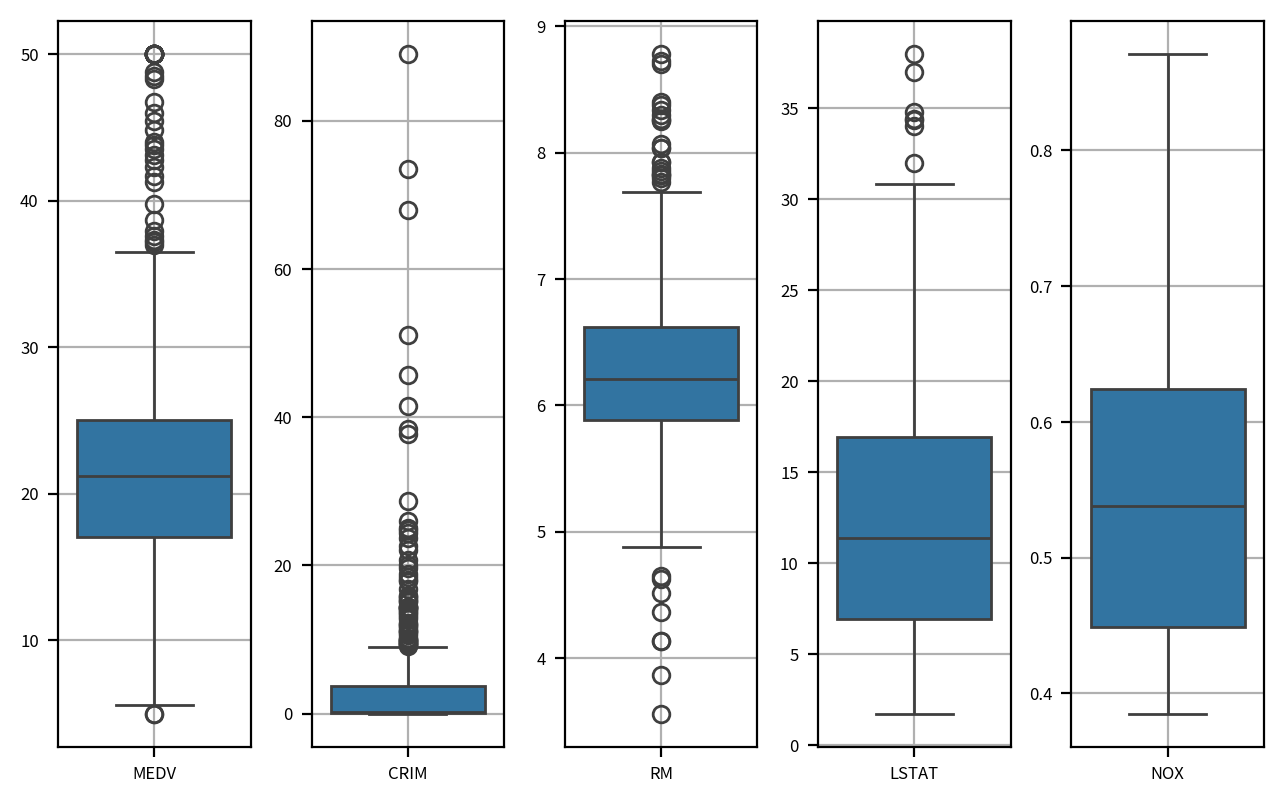

In [262]:
# 1. 그래프 초기화
width_px=1280
height_px=800
rows=1
cols=5
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
for i, col in enumerate(['MEDV', 'CRIM', 'RM', 'LSTAT', 'NOX']):
    sb.boxplot(data=df[[col]], orient='v', ax=ax[i])
    ax[i].grid(True)

# 3. 그래프 꾸미기
# ax.grid(True)
# ax.set_title('⭐', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
# ax.set_xlabel('⭐', color='#ff6600', fontsize=16, labelpad=10)
# ax.set_ylabel('⭐', color='#ff00ff', fontsize=16, labelpad=10)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

1. NOX를 제외한 모든 곳에서 이상치가 존재함을 알 수 있다.
2. MEDV, CRIM, LSTAT은 큰 값으로 이상치가 다수 존재하는 것을 보아 우편향 되어있는 데이터임을 알 수 있다.
3. RM의 데이터의 이상치는 큰 값과 작은 값 모두 존재하므로, 중앙에 데이터가 다수 몰려있지만 위아래로 이상치가 어느정도 존재함을 알 수 있다.

## 🎯 Mission 3 : 분포 정규성 확인

### 3-1 주택 가격 히스토그램 분석

주택 가격(MEDV)의 히스토그램을 그리고 분포의 형태를 분석하시오.

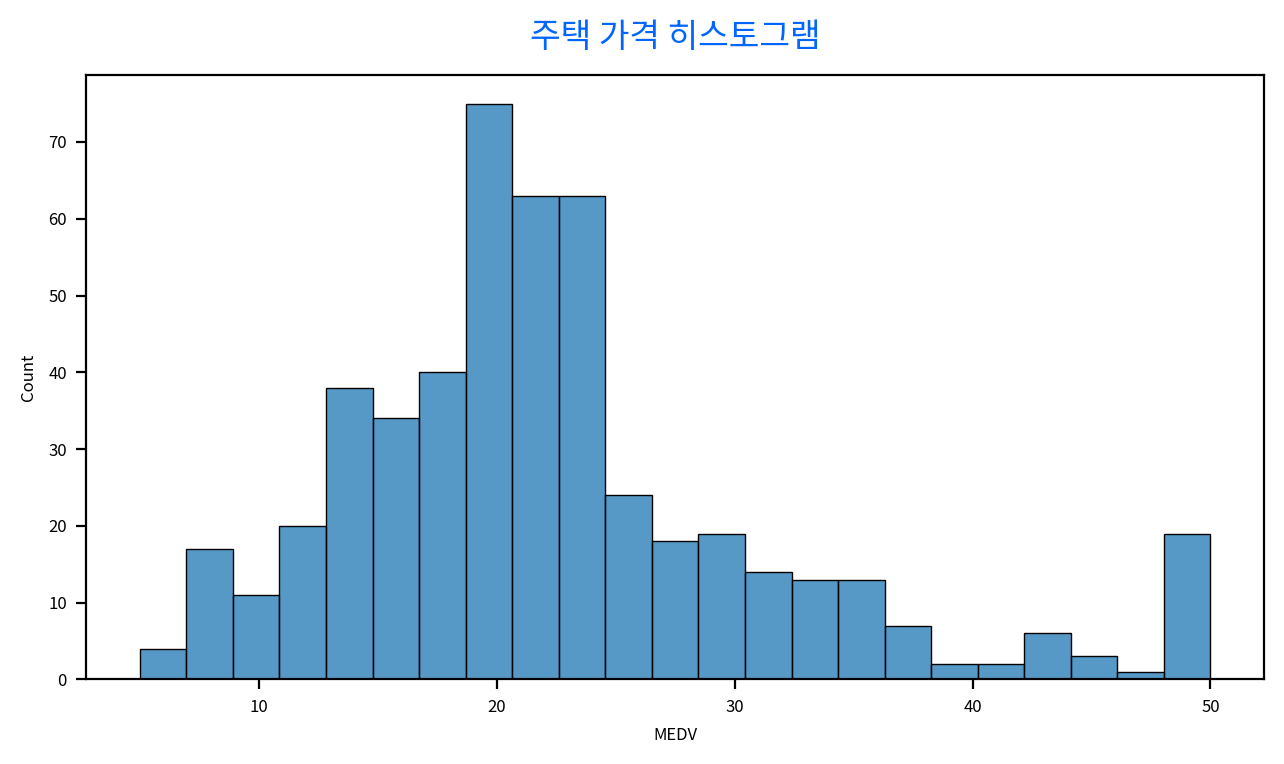

In [263]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.histplot(data=df['MEDV'], edgecolor='#000000', linewidth=0.5)

# 3. 그래프 꾸미기
# ax.grid(True)
ax.set_title('주택 가격 히스토그램', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
# ax.set_xlabel('⭐', color='#ff6600', fontsize=16, labelpad=10)
# ax.set_ylabel('⭐', color='#ff00ff', fontsize=16, labelpad=10)
# ax.set_xlim([⭐,⭐])      # x축 범위
# ax.set_ylim([⭐,⭐])   # y축 범위
# ax.set_xticks([1,2,3,4], ['1학년','2학년','3학년','4학년'])
# ax.set_yticks(range(70,101,3),range(70,101,3))

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

50 부근의 아주 높은 구간에 이상치가 존재하기는 하지만, 전체적으로 정규분포 형태를 띄는 균형잡힌 분포를 보여주고 있다.

### 3-2 변수들의 로그변환 및 분포 분석

심하게 치우친 변수들(CRIM, NOX, LSTAT)에 대해 로그 변환을 적용하고, 변환 전후의 분포를 비교분석하시오.

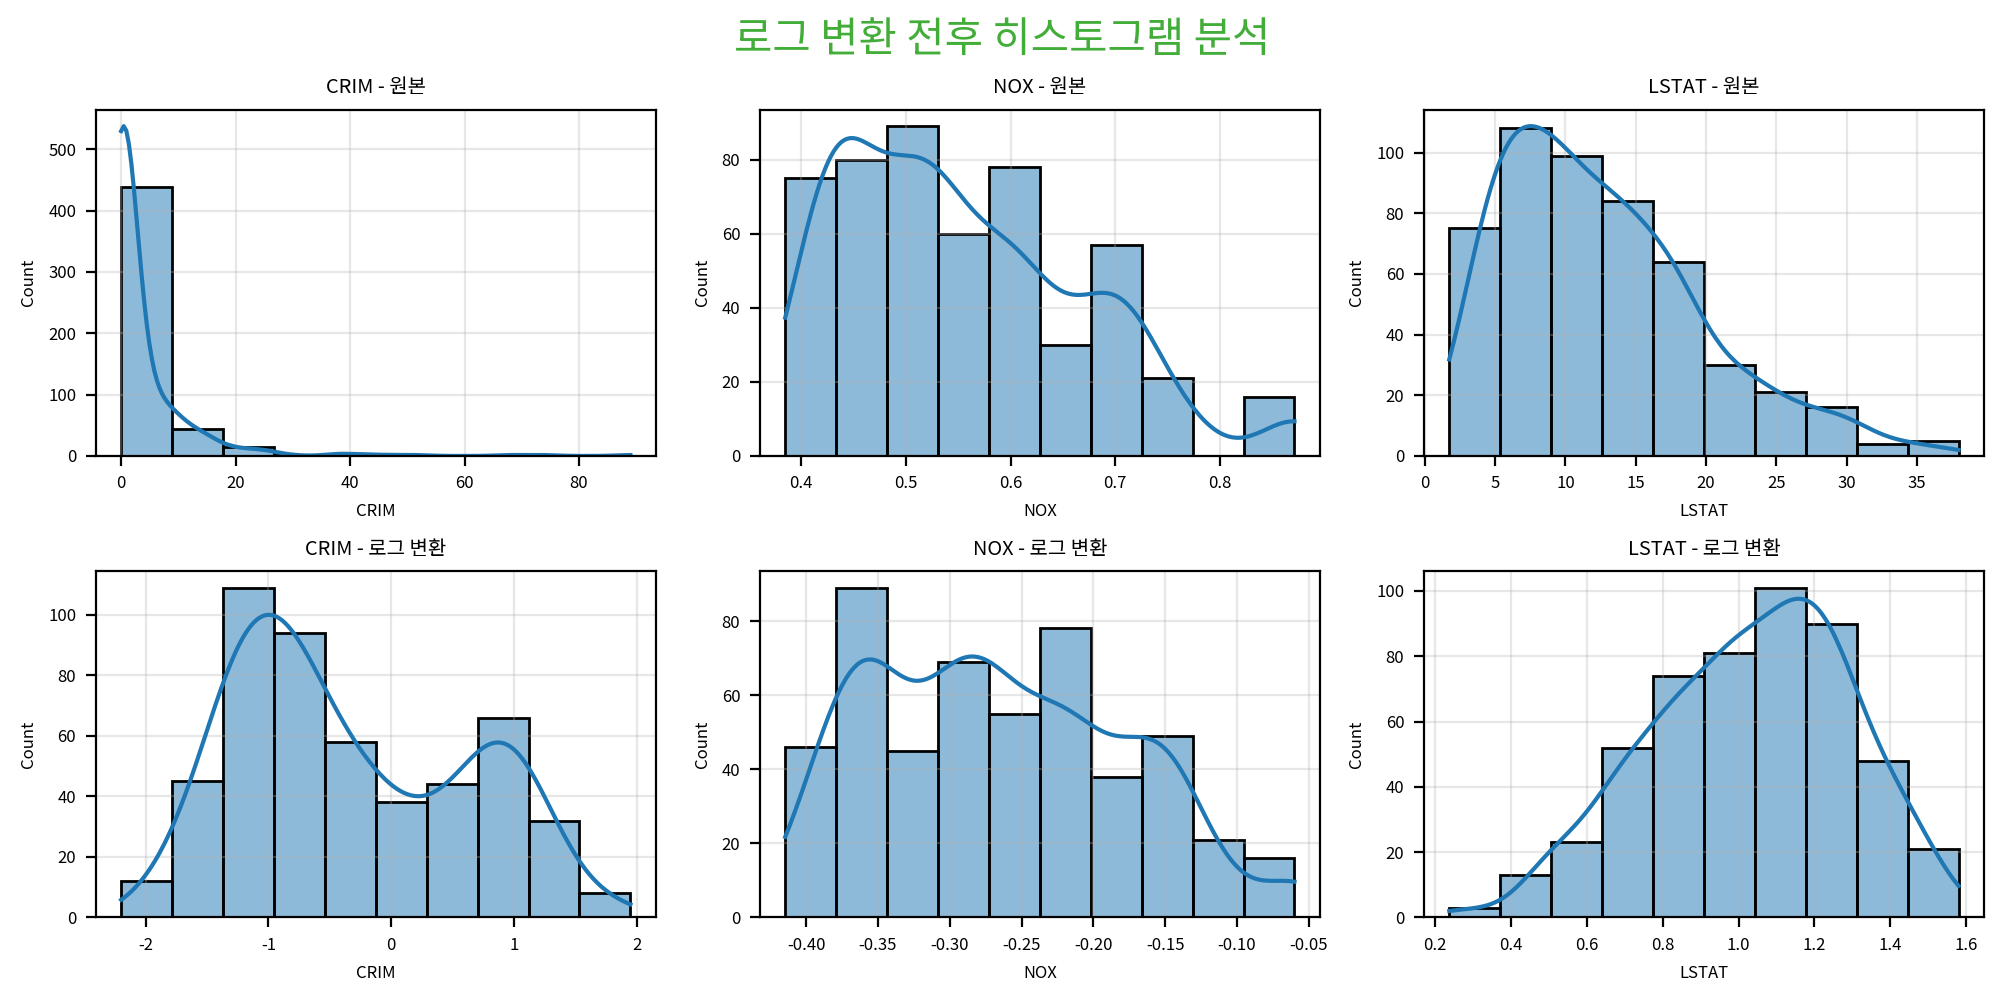

In [264]:
# 1. 그래프 초기화
width_px=2000
height_px=1000
rows=2
cols=3
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
for i, col in enumerate(['CRIM','NOX','LSTAT']):
    sb.histplot(df[col], bins=10, kde=True, ax=ax[0][i])
    ax[0][i].grid(True, alpha=0.3)
    ax[0][i].set_title(f'{col} - 원본')

    data=df[df[col]>0][col]
    log_data=np.log10(data)
    sb.histplot(log_data, bins=10, kde=True, ax=ax[1][i])
    ax[1][i].grid(True, alpha=0.3)
    ax[1][i].set_title(f'{col} - 로그 변환')

fig.suptitle('로그 변환 전후 히스토그램 분석', fontsize=15, color="#43AD39")

plt.tight_layout()
plt.show()
plt.close()

1. CRIM 데이터는 심각한 좌편향의 모습을 띄고 있다. 로그 변환을 적용하여 나타냈을 때에는 양봉 형태를 띄는 걸 볼 수 있다.
2. NOX 데이터는 기존 데이터와 로그변환 데이터의 차이가 크지 않다. 둘 모두 좌편향의 경향을 띄고 있다.
3. LSTAT 데이터는 기존 데이터가 좌편향인데 반해, 로그변환 데이터는 우편향인 모습을 보여주고 있다.

## 🎯 Mission 4 : 범주형 변수 분석

### 4-1 변수의 빈도분석

찰스강변 여부(CHAS) 변수의 빈도분석을 수행하시오.

In [265]:
CHAS_count=df['CHAS'].value_counts()

In [266]:
CHAS_prop=df['CHAS'].value_counts(normalize=True)
CHAS_prop[1]

np.float64(0.0691699604743083)

In [267]:
print('강변 근처에 위치한 집들의 수 : %d (%f %%)'%(CHAS_count[1], CHAS_prop[1]))
print('강변 근처에 위치하지 않은 집들의 수 : %d (%f %%)'%(CHAS_count[0], CHAS_prop[0]))

강변 근처에 위치한 집들의 수 : 35 (0.069170 %)
강변 근처에 위치하지 않은 집들의 수 : 471 (0.930830 %)


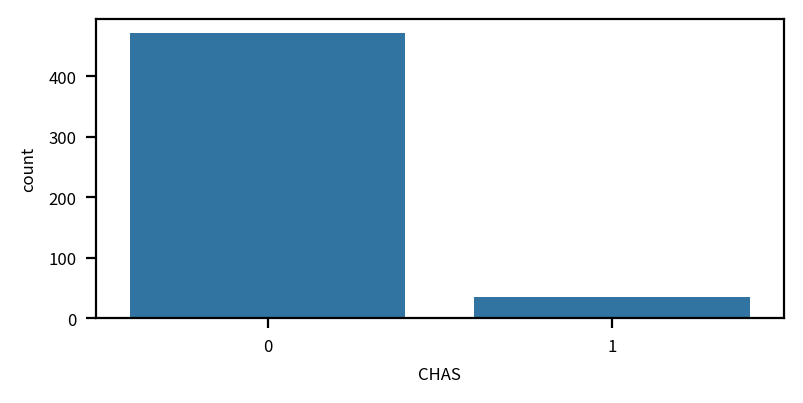

In [268]:
# 1. 그래프 초기화
width_px=800
height_px=400
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.countplot(data=df, x='CHAS')

# # 3. 그래프 꾸미기
# ax.grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 4-2 기초통계량 분석

강변 위치에 따른 주택 가격 차이를 기초통계량으로 비교 분석하시오.

In [269]:
# print('강변에 인접한 주택의 기초통계량')
# print(df[df['CHAS']==1]['MEDV'].describe())
# print('---------------------------------------------')
# print('강변에 인접하지 않은 주택의 기초통계량')
# print(df[df['CHAS']==0]['MEDV'].describe())

df.groupby('CHAS')['MEDV'].describe()

C:\Users\itwill\AppData\Local\Temp\ipykernel_12384\971009995.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CHAS')['MEDV'].describe()


,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


1. 강변에 인접한 주택보다, 강변에 인접하지 않은 주택의 수가 훨씬 많다.
2. 강변에 인접한 주택이 강변에 인접하지 않은 주택보다 평균 주택가격이 높다.
3. 강변에 인접한 주택은 평균과 중위수의 값 차이가 크고 표준편차도 높게 나타나는 것으로 보아, 같은 강변이라도 위치에 따른 가격차가 심하게 존재함을 알 수 있다.
4. 강변에 인접하지 않은 주택은 평균과 중위수 차이가 작고 표준편차도 낮게 나타나는 것으로 보아, 안정적인 데이터 분포를 가지고 있음을 알 수 있다.

## 🎯 Mission 5 : 종합 분석 보고서 작성

### 5-1 데이터 품질 종합 평가

데이터 품질을 다음 기준으로 종합 평가하시오.
- 완성도(Completeness) : 결측값 현황
- 일관성(Consistency) : 데이터 타입의 적합성
- 분포 특성 : 정규성 및 이상값 현황

In [270]:
print('1. 완성도 분석\n')
print(origin.isna().sum(),'\n')
print('데이터의 결측치가 존재하지 않으므로, 완성도 부분에서는 완벽하다고 할 수 있다.')

1. 완성도 분석

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64 

데이터의 결측치가 존재하지 않으므로, 완성도 부분에서는 완벽하다고 할 수 있다.


In [271]:
print('2. 일관성 분석\n')
print(origin.info(),'\n')
print('찰스강 인접 여부를 나타내는 "CHAS"라는 변수가 int 타입으로 되어 있다. 이 부분을 category화 해서 데이터 분석을 진행해야 할 것이다.')

2. 일관성 분석

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None 

찰스강 인접 여부를 나타내는 "CHAS"라는 변수가 int 타입으로 되어 있다. 이 부분을 category화 해서 데이터 분석을 진행해야 할 것이다.


In [272]:
print('3. 분포 특성\n')
print('CRIM, ZN, INDUS, NOX, AGE, RAD, TAX, B, LSTAT, MEDV 변수는 표준편차가 크게 나타나기 때문에 정규분포와는 거리가 있다.')
print('RM, DIS, PTRATIO 변수는 다른 변수들에 비해 표준편차가 낮고, 평균과 중위수 값의 차이가 적기 때문에 정규분포에 가깝다고 할 수 있다.')
df.describe().T

3. 분포 특성

CRIM, ZN, INDUS, NOX, AGE, RAD, TAX, B, LSTAT, MEDV 변수는 표준편차가 크게 나타나기 때문에 정규분포와는 거리가 있다.
RM, DIS, PTRATIO 변수는 다른 변수들에 비해 표준편차가 낮고, 평균과 중위수 값의 차이가 적기 때문에 정규분포에 가깝다고 할 수 있다.


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


### 5-2 인사이트 도출

투자자문팀을 위한 핵심 인사이트를 3가지 이상 도출하시오.
- 보스턴 지역 주택 시장의 전반적 특성
- 투자 시 주의해야 할 데이터 상의 특징
- 추가 분석이 필요한 영역

1. 보스턴 지역 주택 시장의 전반적 특성
- 'CHAS' 변수를 보았을 때, 주택이 찰스강에 인접해 있는 경우 평균 집값이 상승한다는 것을 알 수 있다.
- 평균, 데이터범위(최대-최소), 중위값을 이용하여 데이터의 분포 특성을 언급할 것.

2. 투자 시 주의해야 할 데이터 상의 특징
- 강변 주변이 평균 28.7% 더 높다.

3. 추가 분석이 필요한 영역
- 흑인 비율, 부촌 여부, 교육, 교통 등 다른 변수들에 대해서도 같은 흐름으로 파악이 필요함.

# 🍊 제주도 남녀 대학생 분석

privacy 데이터셋은 제주도 남녀 대학생의 개인정보 관리방법에 관한 설문조사 결과이다.  
자료를 직접 입력하고 남녀별 메모의 종류별로 비율을 확인할 수 있는 데이터를 구성하고 시각화하라.

In [277]:
origin=load_data('privacy')
origin.head()

[data] https://data.hossam.kr/data/lab09/privacy.xlsx
[desc] 제주도 남녀 대학생의 개인정보 관리방법에 관한 설문조사 결과 데이터 (출처: 사회조사분석사 2급 실기작업형 기출)
[!] Cannot read metadata


,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2


In [278]:
df=origin.astype({'성별':'category', '메모종류':'category'})
df.head()

,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2


In [279]:
cb=crosstab(index=df['성별'], columns=df['메모종류'], normalize=True)
cb

메모종류,1,2,3
성별,,,
남,0.066667,0.133333,0.066667
여,0.133333,0.533333,0.066667


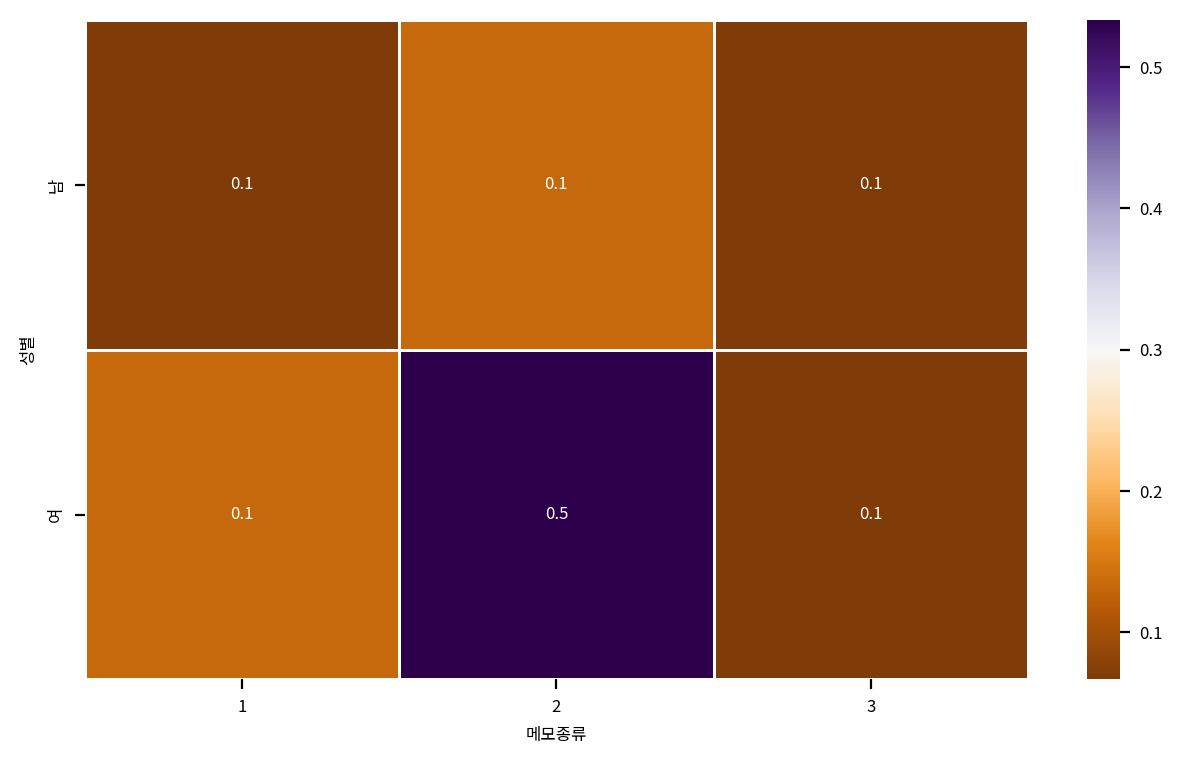

In [281]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.heatmap(data=cb, annot=True, fmt='0.1f', linewidth=0.5, cmap='PuOr')

# 3. 그래프 꾸미기
# ax.grid(True)
# ax.set_title('⭐', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
# ax.set_xlabel('⭐', color='#ff6600', fontsize=16, labelpad=10)
# ax.set_ylabel('⭐', color='#ff00ff', fontsize=16, labelpad=10)
# ax.set_xlim([⭐,⭐])      # x축 범위
# ax.set_ylim([⭐,⭐])   # y축 범위
# ax.set_xticks([1,2,3,4], ['1학년','2학년','3학년','4학년'])
# ax.set_yticks(range(70,101,3),range(70,101,3))

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()